In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the data
df = pd.read_csv("../data/heart.csv")
print(f"Shape: {df.shape}")

# Split into features and target
X = df.drop(columns=["target"])
y = df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Shape: (303, 14)


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

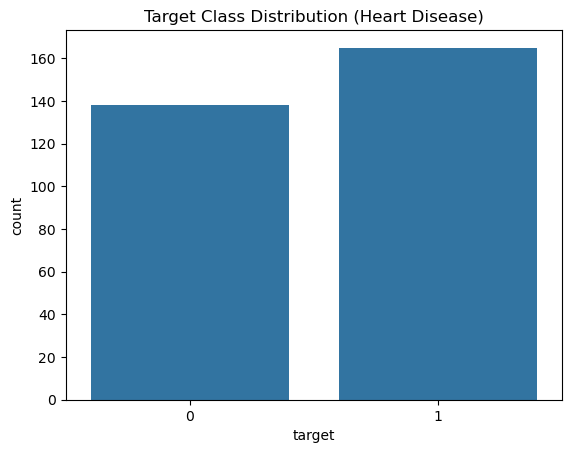

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize target class distribution
sns.countplot(x="target", data=df)
plt.title("Target Class Distribution (Heart Disease)")
plt.show()

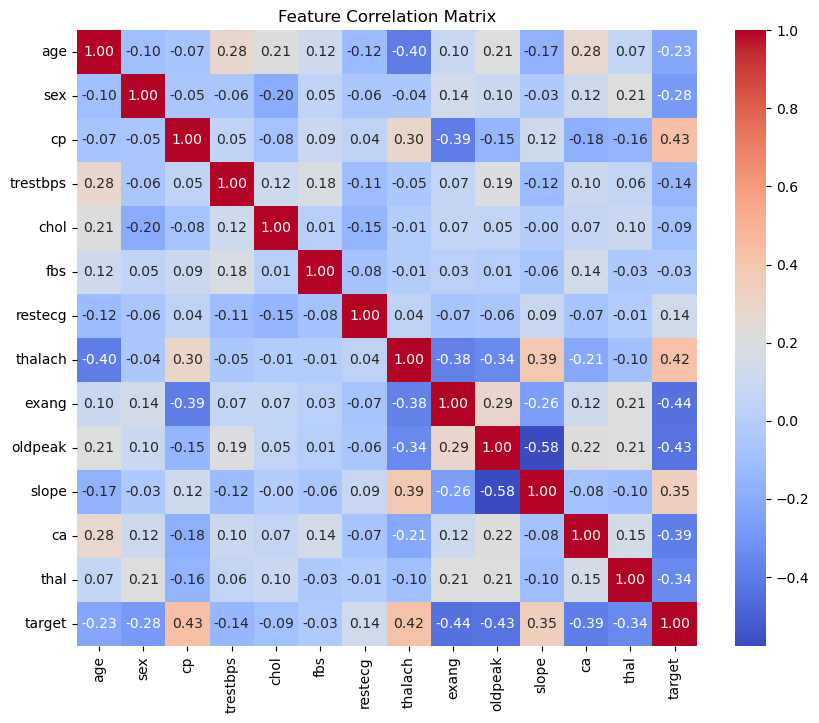

In [5]:
# Correlation matrix to check relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=False)
plt.title("Feature Correlation Matrix")
plt.show()

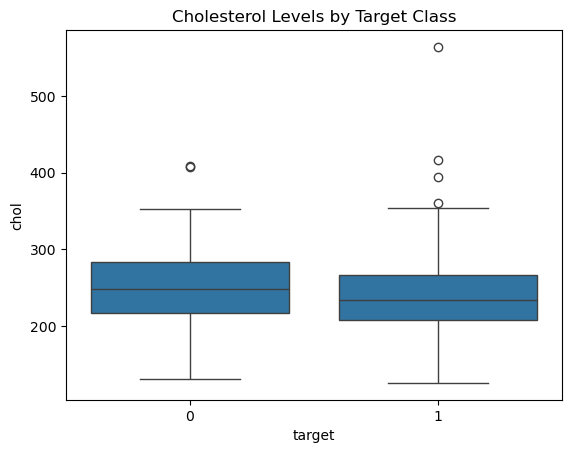

In [6]:
sns.boxplot(x="target", y="chol", data=df)
plt.title("Cholesterol Levels by Target Class")
plt.show()

In [7]:
def logistic_eval(X_train, y_train, X_test, y_test):
    '''
    
    '''
    # Train logistic regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return None

In [8]:
logistic_eval(X_train, y_train, X_test, y_test)

Accuracy: 80.33%
Confusion Matrix:
[[19  9]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [11]:
# change targets from [0,1] to [-1,1]
train_targets = np.where(y_train==0, -1, y_train)
test_targets = np.where(y_test==0, -1, y_test)
print(train_targets)
print(test_targets)

[ 1 -1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1
  1 -1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1  1
  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1
  1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1
  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1
 -1  1  1 -1  1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1 -1  1  1  1
 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1
  1  1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1
  1  1]
[-1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1
  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1
  1 -1 -1  1  1 -1  1  1  1  1 -1 -1  1]


In [12]:
logistic_eval(X_train, train_targets, X_test, test_targets) 

Accuracy: 80.33%
Confusion Matrix:
[[19  9]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [14]:
# scale the inputs
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train)
X_test_std_scaled = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
X_train_mm_scaled = mm_scaler.fit_transform(X_train)
X_test_mm_scaled = mm_scaler.transform(X_test)

In [15]:
logistic_eval(X_train_std_scaled, train_targets, X_test_std_scaled, test_targets)
logistic_eval(X_train_mm_scaled, train_targets, X_test_mm_scaled, test_targets)

Accuracy: 80.33%
Confusion Matrix:
[[19  9]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

Accuracy: 80.33%
Confusion Matrix:
[[18 10]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



In [26]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def make_polynomial_data(X, degree=2, scale=True, interaction_only=False):
    """
    Apply polynomial feature expansion (with optional scaling) to input features.
    
    Args:
        X (np.array or pd.DataFrame): Feature matrix
        degree (int): Degree of polynomial features
        scale (bool): Whether to apply StandardScaler to the expanded features
        interaction_only (bool): If True, only interaction terms (no powers)
    
    Returns:
        X_poly_transformed (np.array): Transformed feature matrix
    """
    poly = PolynomialFeatures(degree=degree, include_bias=False, interaction_only=interaction_only)
    X_poly = poly.fit_transform(X)
    
    if scale:
        scaler = StandardScaler()
        X_poly = scaler.fit_transform(X_poly)
    
    return X_poly

def test_polynomial_degrees(X_train, y_train, X_test, y_test, max_degree=10):
    """
    Expands features using polynomial transformations from degree 1 to max_degree,
    evaluates logistic regression accuracy, and plots results.
    """
    from sklearn.metrics import accuracy_score

    degrees = list(range(1, max_degree + 1))
    accuracies = []

    for degree in degrees:
        # Transform features
        X_train_poly = make_polynomial_data(X_train, degree=degree)
        X_test_poly = make_polynomial_data(X_test, degree=degree)

        # Train and evaluate
        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

        print(f"Degree {degree}: Accuracy = {acc*100:.2f}%")

    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(degrees, [a * 100 for a in accuracies], marker='o')
    plt.title("Logistic Regression Accuracy vs. Polynomial Degree")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("Test Accuracy (%)")
    plt.grid(alpha=0.3)
    plt.xticks(degrees)
    plt.tight_layout()
    plt.show()

    return degrees, accuracies

Degree 1: Accuracy = 80.33%
Degree 2: Accuracy = 81.97%
Degree 3: Accuracy = 75.41%
Degree 4: Accuracy = 77.05%
Degree 5: Accuracy = 78.69%
Degree 6: Accuracy = 78.69%
Degree 7: Accuracy = 78.69%
Degree 8: Accuracy = 80.33%
Degree 9: Accuracy = 80.33%
Degree 10: Accuracy = 75.41%


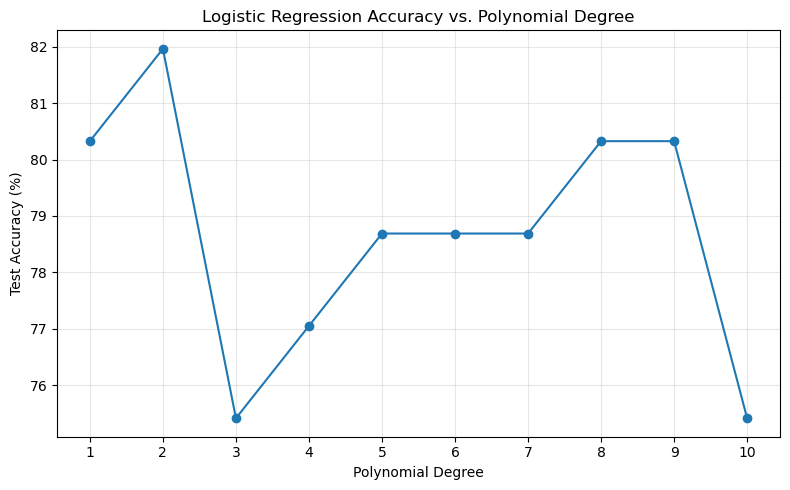

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0.8032786885245902,
  0.819672131147541,
  0.7540983606557377,
  0.7704918032786885,
  0.7868852459016393,
  0.7868852459016393,
  0.7868852459016393,
  0.8032786885245902,
  0.8032786885245902,
  0.7540983606557377])

In [27]:
test_polynomial_degrees(X_train, y_train, X_test, y_test)

In [28]:
from sklearn.feature_selection import RFE

def run_rfe(X, y, num_features=5):
    """
    Run Recursive Feature Elimination (RFE) with logistic regression to select top features.
    
    Returns:
        selected_feature_names: list of column names that were selected
        X_selected: transformed input with selected features only
    """
    model = LogisticRegression(max_iter=1000, random_state=42)
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    rfe.fit(X, y)

    if isinstance(X, pd.DataFrame):
        selected_features = X.columns[rfe.support_]
        X_selected = X[selected_features]
    else:
        selected_features = rfe.support_
        X_selected = X[:, rfe.support_]

    return selected_features, X_selected

In [50]:
# Run RFE on original (unscaled) data
selected_features, X_train_rfe = run_rfe(X_train_std_scaled, y_train, num_features=6)

# Also apply to test set
X_test_rfe = X_test_std_scaled[:, selected_features]

# Transform and scale before feeding into model
X_train_rfe_poly = make_polynomial_data(X_train_rfe, degree=2)
X_test_rfe_poly = make_polynomial_data(X_test_rfe, degree=2)

logistic_eval(X_train_rfe_poly, y_train, X_test_rfe_poly, y_test)

Accuracy: 85.25%
Confusion Matrix:
[[21  7]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [56]:
selected_features

array([False,  True,  True, False, False, False, False,  True, False,
        True, False,  True,  True])

In [63]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [66]:
X.columns[selected_features]

Index(['sex', 'cp', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')

In [71]:
unselected_columns = [col for col in X.columns if col not in X.columns[selected_features]]
unselected_columns

['age', 'trestbps', 'chol', 'fbs', 'restecg', 'exang', 'slope']

In [72]:
X = X.drop(columns=unselected_columns)
X

,sex,cp,thalach,oldpeak,ca,thal
0,1,3,150,2.3,0,1
1,1,2,187,3.5,0,2
2,0,1,172,1.4,0,2
3,1,1,178,0.8,0,2
4,0,0,163,0.6,0,2
...,...,...,...,...,...,...
298,0,0,123,0.2,0,3
299,1,3,132,1.2,0,3
300,1,0,141,3.4,2,3
301,1,0,115,1.2,1,3
